# Lesson 8.04 Time Series II

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from fbprophet import Prophet

## Data Processing

In [2]:
# read csv file
# More info on data set can be found at https://data.gov.sg/dataset/container-throughput-monthly-total
df = pd.read_csv('container-throughput-monthly.csv', index_col='date', parse_dates=True)
df.head()

,container_throughput
date,
1995-01-01,946.36
1995-02-01,867.45
1995-03-01,969.54
1995-04-01,960.13
1995-05-01,988.27


In [3]:
# Resets any prevailing indexes of the DataFrame, and use the default one instead
df = df.reset_index()

In [4]:
# Requirement for FBProphet Model - Date column to be named as ds and Y column to be named as y
df=df.rename(columns={'date':'ds', 'container_throughput':'y'})

In [5]:
# optional check
df.head()

,ds,y
0,1995-01-01,946.36
1,1995-02-01,867.45
2,1995-03-01,969.54
3,1995-04-01,960.13
4,1995-05-01,988.27


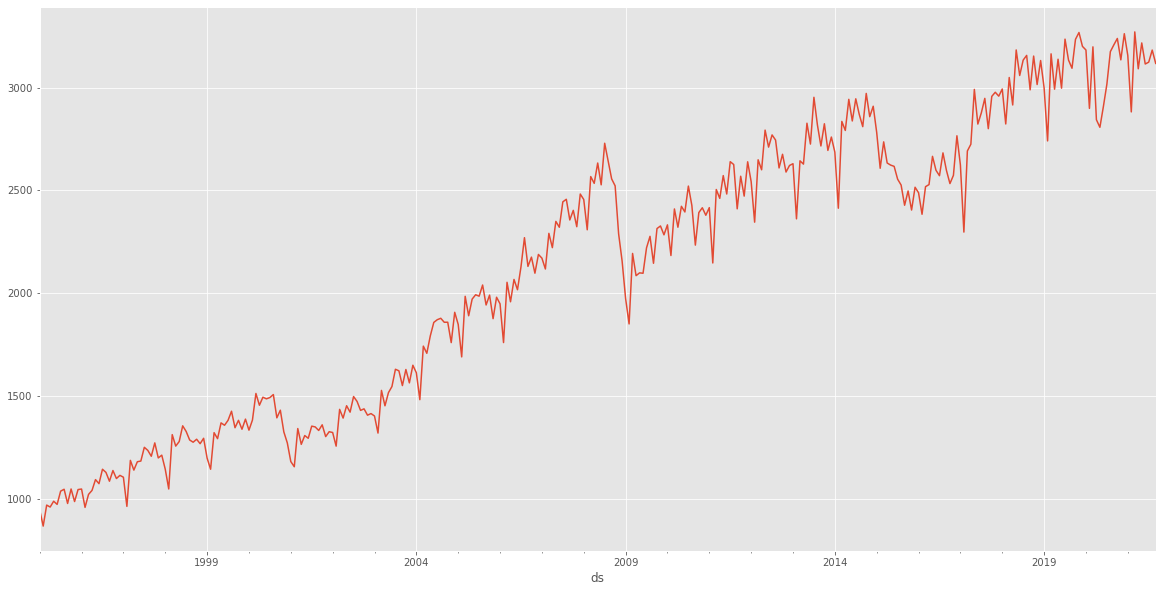

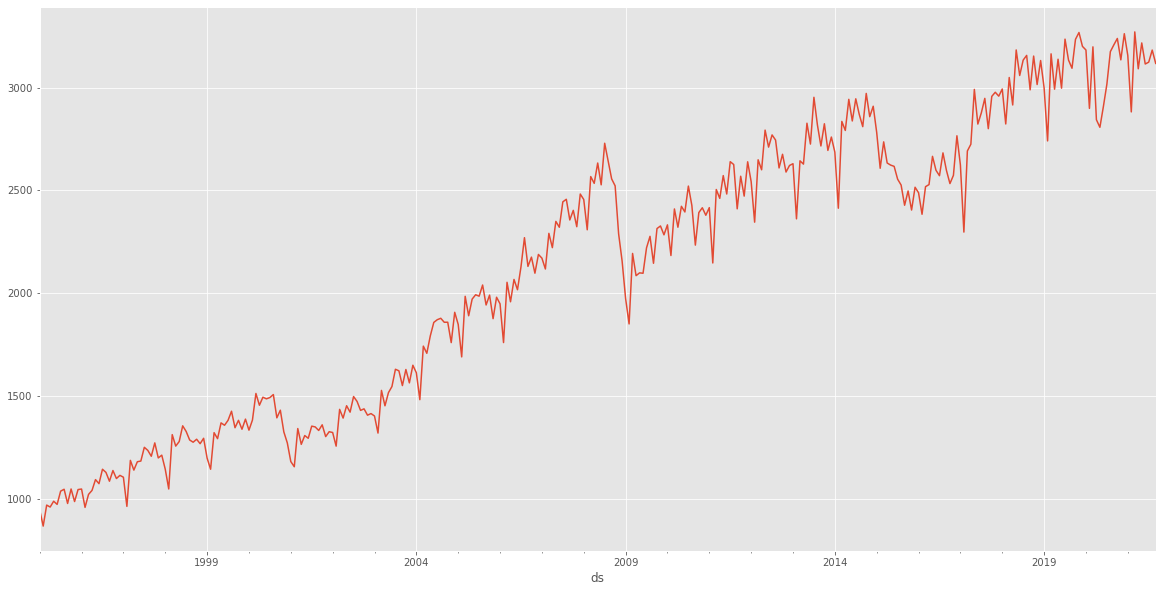

In [6]:
# Plot the data set
df.set_index('ds').y.plot().get_figure()

In [7]:
# Monthly seasonality will be set to True by default since FBProphet would have inferred it from the data set
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

# optional print - to check the status of weekly seasonality
model.weekly_seasonality

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


True

In [8]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
340,2023-04-30
341,2023-05-31
342,2023-06-30
343,2023-07-31
344,2023-08-31


## Build `FBProphet` Model

In [9]:
forecast = model.predict(future)

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
340,2023-04-30,3381.315578,3220.546474,3537.904661
341,2023-05-31,3342.536905,3172.663090,3505.567285
342,2023-06-30,3489.392820,3333.441850,3652.523123
343,2023-07-31,3424.002975,3256.272947,3585.849465
344,2023-08-31,3236.776319,3060.291545,3392.045936


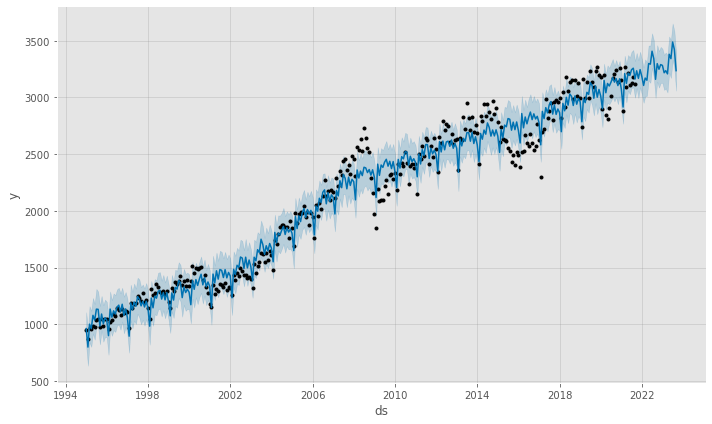

In [11]:
model.plot(forecast);

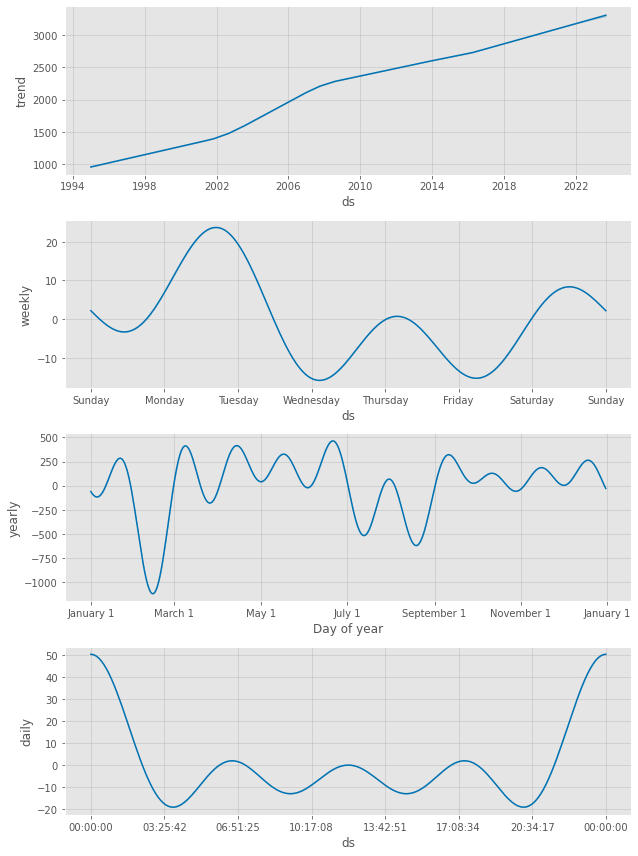

In [12]:
# decompose time series model into trend and seasonality
model.plot_components(forecast);

## Model Evaluation
Evaluate model performance based on historical date range where both the predictions and actuals values are available

In [13]:
# add forecasted data to existing data set / data frame
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [14]:
# optional - quick check on the future dates where the actual values are not available
metric_df.tail()

,ds,yhat,y
340,2023-04-30,3381.315578,NaN
341,2023-05-31,3342.536905,NaN
342,2023-06-30,3489.392820,NaN
343,2023-07-31,3424.002975,NaN
344,2023-08-31,3236.776319,NaN


In [15]:
# drop the rows of future dates where the actual values are not available
metric_df.dropna(inplace=True)

In [16]:
# optional - confirm if the rows of future dates have been dropped
metric_df.tail()

,ds,yhat,y
316,2021-05-01,3215.463970,3216.90425
317,2021-06-01,3194.805815,3114.50650
318,2021-07-01,3245.041714,3123.55950
319,2021-08-01,3258.680993,3182.28100
320,2021-09-01,3162.961501,3117.35950


In [17]:
rsquared = r2_score(metric_df.y, metric_df.yhat)
print('R-Squared: %.3f' % rsquared)

R-Squared: 0.968


In [18]:
mse= mean_squared_error(metric_df.y, metric_df.yhat)
print('MSE: %.3f' % mse)

MSE: 15375.149


In [19]:
rmse = mean_squared_error(metric_df.y, metric_df.yhat, squared=False)
print('RMSE: %.3f' % rmse)

RMSE: 123.997


In [20]:
mae = mean_absolute_error(metric_df.y, metric_df.yhat)
print('MAE: %.3f' % mae)

MAE: 96.178


In [21]:
mape = np.mean(np.abs((metric_df.y - metric_df.yhat)/metric_df.y))*100
print('MAPE: %.3f' % mape)

MAPE: 4.607
